In [1]:
import pandas as pd  # import pandas first

file_path = "/Users/sankalpajoshi/Downloads/Data Science Project Files/Call_center/01 Call-Center-Dataset.xlsx"
df = pd.read_excel(file_path)

print(df.head())


  Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01  09:47:31   Contract related              Y   
4  ID0005    Becky  2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0        00:02:23                  3.0  
1        N                        70.0        00:04:02                  3.0  
2        Y                        10.0        00:02:11                  3.0  
3        Y                        53.0        00:00:37                  2.0  
4        Y                        95.0        00:01:00                  3.0  


In [3]:
import pandas as pd

# Step 1: Rename columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Convert avg_talkduration (datetime.time) to seconds
df["avg_talkduration_sec"] = (
    pd.to_timedelta(df["avgtalkduration"].astype(str))
    .dt.total_seconds()
)

# Step 3: Convert date and time
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.time

# Step 4: Map Y/N to 1/0
df["answered"] = df["answered_(y/n)"].map({"Y": 1, "N": 0})
df["resolved"] = df["resolved"].map({"Y": 1, "N": 0})

# Step 5: Quick check
print(df.head())
print(df.info())


  call_id    agent       date      time              topic answered_(y/n)  \
0  ID0001    Diane 2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky 2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart 2021-01-01  09:47:31   Contract related              Y   
3  ID0004     Greg 2021-01-01  09:47:31   Contract related              Y   
4  ID0005    Becky 2021-01-01  10:00:29    Payment related              Y   

   resolved  speed_of_answer_in_seconds avgtalkduration  satisfaction_rating  \
0         1                       109.0        00:02:23                  3.0   
1         0                        70.0        00:04:02                  3.0   
2         1                        10.0        00:02:11                  3.0   
3         1                        53.0        00:00:37                  2.0   
4         1                        95.0        00:01:00                  3.0   

   avg_talkduration_sec  answered  
0                 14

In [4]:
# 1. AHT (in seconds)
aht = (df["avg_talkduration_sec"] + df["speed_of_answer_in_seconds"]).mean()

# 2. First Time Resolution Rate (FTR)
ftr = (df[df["answered"] == 1]["resolved"].mean()) * 100

# 3. Customer Satisfaction (CSAT)
csat = df["satisfaction_rating"].mean()

print(f"Average Handling Time (AHT): {aht:.2f} seconds")
print(f"First Time Resolution Rate (FTR): {ftr:.2f}%")
print(f"Customer Satisfaction (CSAT): {csat:.2f} / 5")


Average Handling Time (AHT): 292.44 seconds
First Time Resolution Rate (FTR): 89.94%
Customer Satisfaction (CSAT): 3.40 / 5


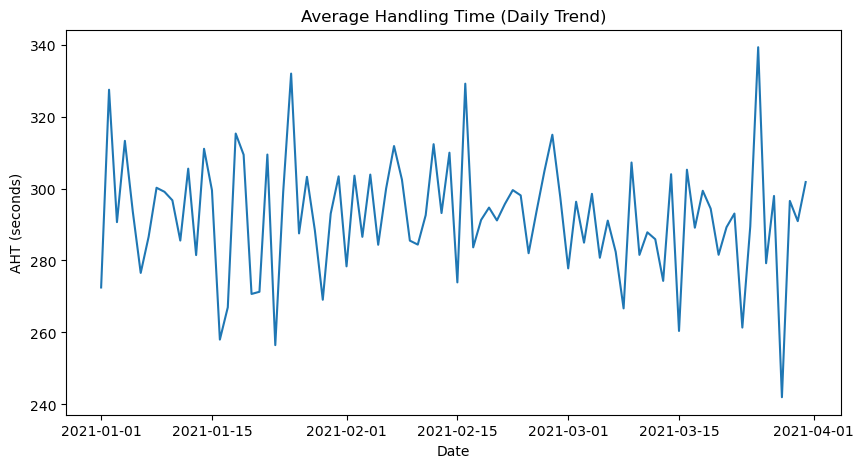

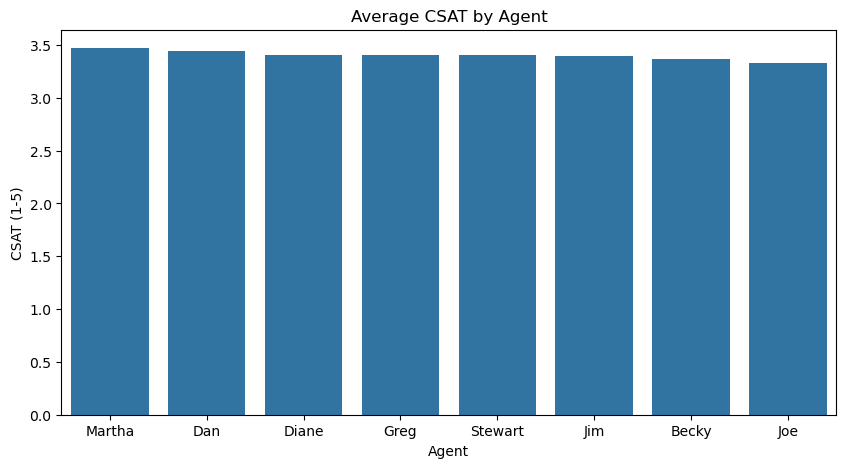

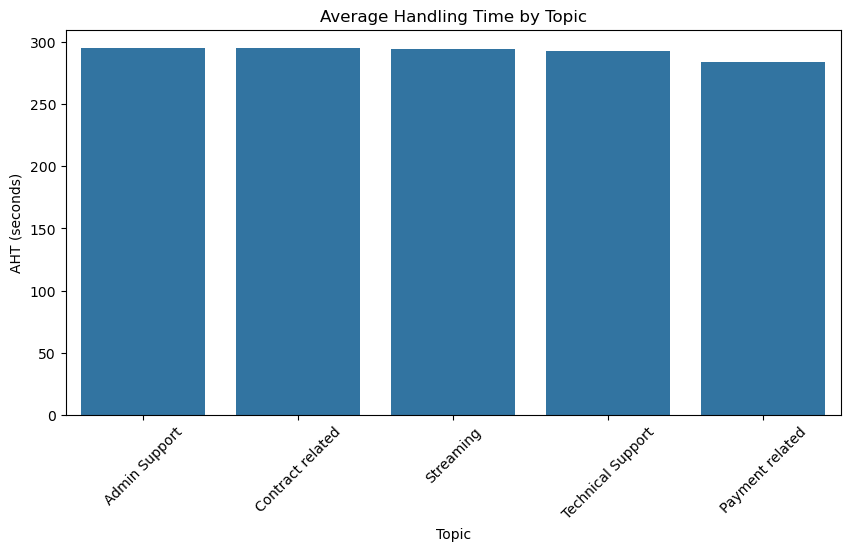

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"])

# --- 1. AHT Trend Over Time ---
df["aht_total_sec"] = df["avg_talkduration_sec"] + df["speed_of_answer_in_seconds"]
daily_aht = df.groupby("date")["aht_total_sec"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_aht, x="date", y="aht_total_sec")
plt.title("Average Handling Time (Daily Trend)")
plt.ylabel("AHT (seconds)")
plt.xlabel("Date")
plt.show()

# --- 2. CSAT by Agent ---
agent_csat = df.groupby("agent")["satisfaction_rating"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=agent_csat, x="agent", y="satisfaction_rating", order=agent_csat.sort_values("satisfaction_rating", ascending=False)["agent"])
plt.title("Average CSAT by Agent")
plt.ylabel("CSAT (1-5)")
plt.xlabel("Agent")
plt.show()

# --- 3. AHT by Topic ---
topic_aht = df.groupby("topic")["aht_total_sec"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=topic_aht, x="topic", y="aht_total_sec", order=topic_aht.sort_values("aht_total_sec", ascending=False)["topic"])
plt.title("Average Handling Time by Topic")
plt.ylabel("AHT (seconds)")
plt.xlabel("Topic")
plt.xticks(rotation=45)
plt.show()


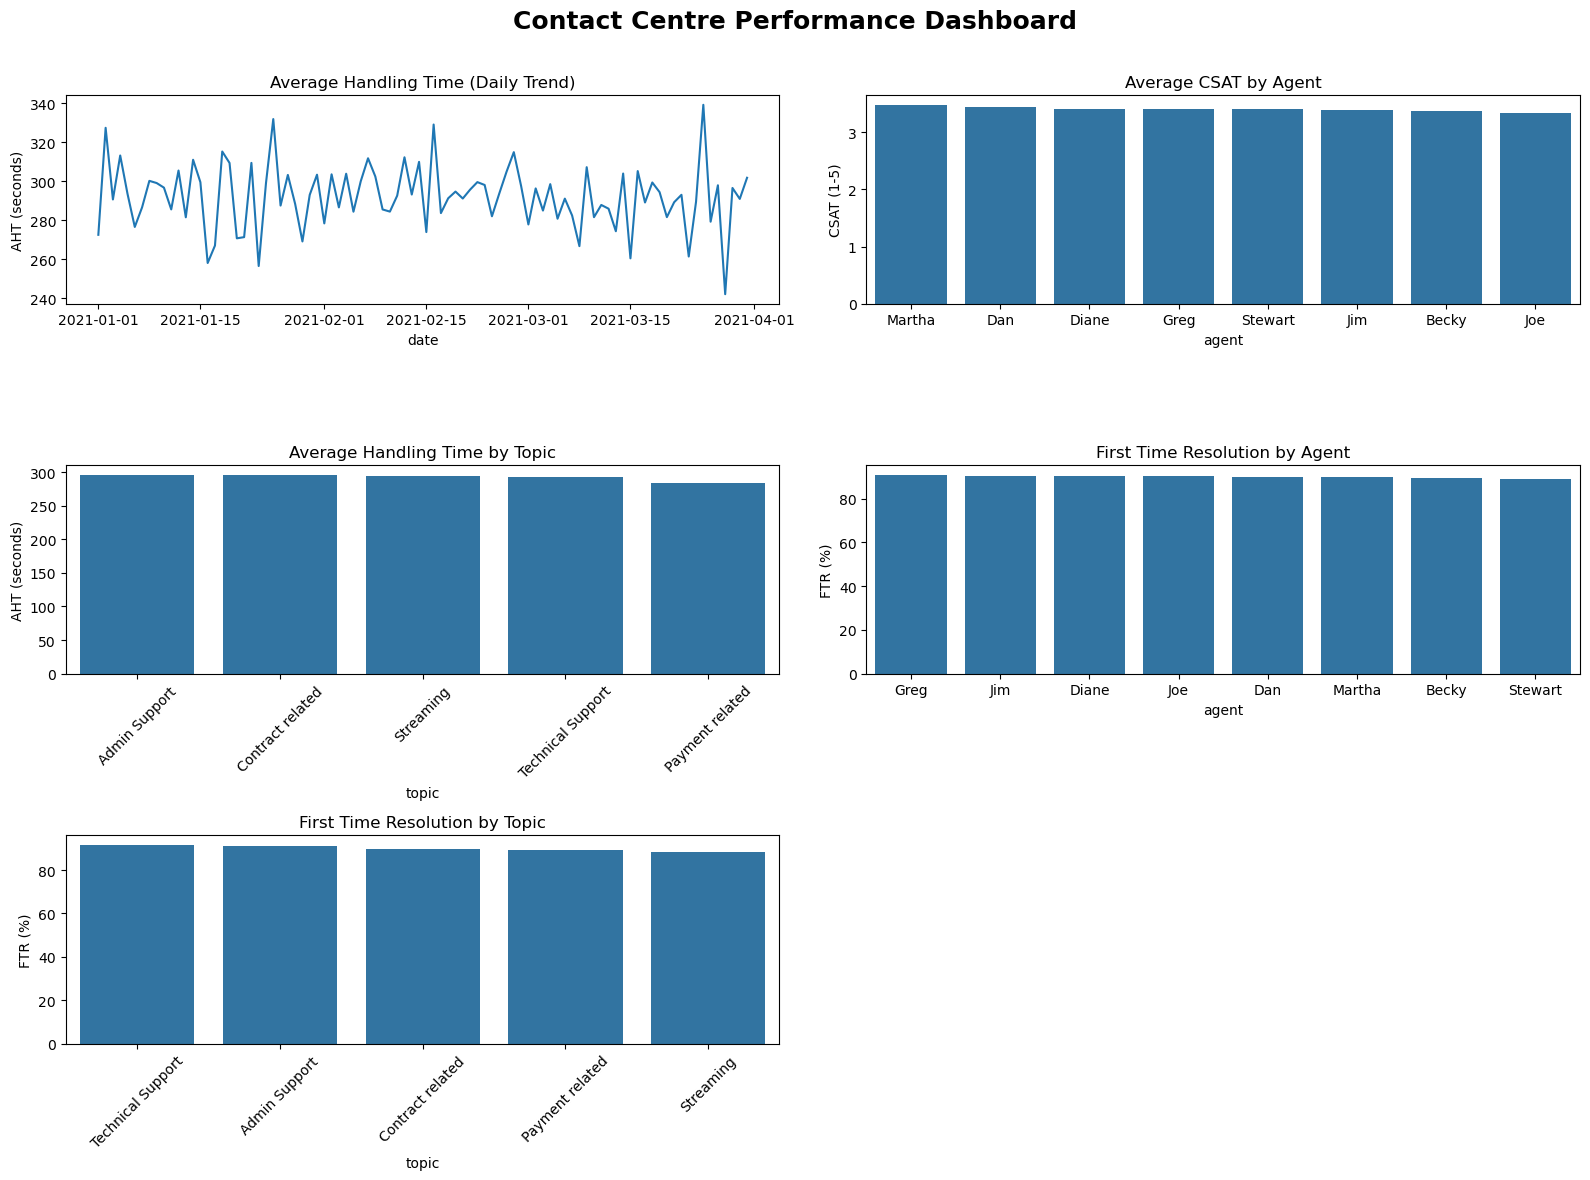

In [6]:
# --- 1. FTR by Agent ---
ftr_by_agent = df[df["answered"] == 1].groupby("agent")["resolved"].mean().reset_index()
ftr_by_agent["resolved"] = ftr_by_agent["resolved"] * 100  # Convert to %

# --- 2. FTR by Topic ---
ftr_by_topic = df[df["answered"] == 1].groupby("topic")["resolved"].mean().reset_index()
ftr_by_topic["resolved"] = ftr_by_topic["resolved"] * 100

# --- 3. Combined Dashboard Layout ---
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle("Contact Centre Performance Dashboard", fontsize=18, fontweight='bold')

# Plot 1: AHT Trend Over Time
sns.lineplot(data=daily_aht, x="date", y="aht_total_sec", ax=axes[0,0])
axes[0,0].set_title("Average Handling Time (Daily Trend)")
axes[0,0].set_ylabel("AHT (seconds)")

# Plot 2: CSAT by Agent
sns.barplot(data=agent_csat, x="agent", y="satisfaction_rating",
            order=agent_csat.sort_values("satisfaction_rating", ascending=False)["agent"],
            ax=axes[0,1])
axes[0,1].set_title("Average CSAT by Agent")
axes[0,1].set_ylabel("CSAT (1-5)")

# Plot 3: AHT by Topic
sns.barplot(data=topic_aht, x="topic", y="aht_total_sec",
            order=topic_aht.sort_values("aht_total_sec", ascending=False)["topic"],
            ax=axes[1,0])
axes[1,0].set_title("Average Handling Time by Topic")
axes[1,0].set_ylabel("AHT (seconds)")
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: FTR by Agent
sns.barplot(data=ftr_by_agent, x="agent", y="resolved",
            order=ftr_by_agent.sort_values("resolved", ascending=False)["agent"],
            ax=axes[1,1])
axes[1,1].set_title("First Time Resolution by Agent")
axes[1,1].set_ylabel("FTR (%)")

# Plot 5: FTR by Topic
sns.barplot(data=ftr_by_topic, x="topic", y="resolved",
            order=ftr_by_topic.sort_values("resolved", ascending=False)["topic"],
            ax=axes[2,0])
axes[2,0].set_title("First Time Resolution by Topic")
axes[2,0].set_ylabel("FTR (%)")
axes[2,0].tick_params(axis='x', rotation=45)

# Hide empty subplot
axes[2,1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [7]:
# Save the figure BEFORE plt.show()
plt.savefig("contact_centre_dashboard.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 640x480 with 0 Axes>